<a href="https://colab.research.google.com/github/AdedokunOluremi/Coursera_Capstone/blob/master/Capstone_Project_Segmenting_and_Clustering_Lagos_State_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

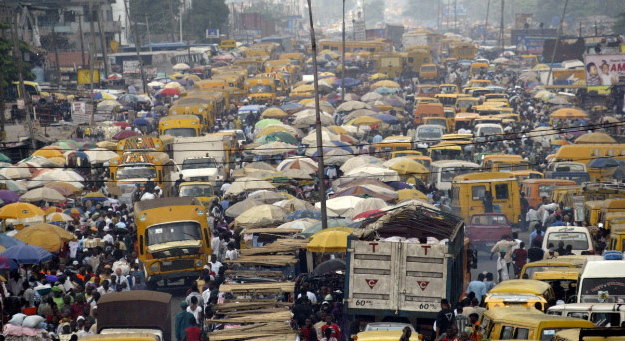

## Exploring, Segmenting and Clustering Lagos City Nigeria using Geolocation Data.

## Oluremi Atilade Adedokun

January 13, 2021

## **1. Introduction**

1.1 **Background**<br>
I lived in Lagos for four years. I worked with Flour Mills of Nigeria Plc. as a Milling Technologist. At that time, the company is the second largest flour milling company in the world and has more than ten fully automated Buhler mills and a daily capacity of more than 8000tons.
Lagos, sometimes referred to as Lagos State to distinguish it from Lagos Metropolitan Area, is a state located in southwestern Nigeria. The smallest in area of Nigeria's 36 states, Lagos State is arguably the most economically important state of the country, containing Lagos, the nation's largest urban area. It is a major financial centre and would be the fifth largest economy in Africa, if it were a country.

It has the highest population density of Nigeria's states. The actual population total is disputed between the official Nigerian Census of 2006 and a much higher figure claimed by the Lagos State Government. Lagos State annual GDP is 1 trillion naira.

Lagos State is bounded on the north and east by Ogun State. In the west it shares boundaries with the Republic of Benin. Behind its southern borders lies the Atlantic Ocean. 22% of its 3,577 km2 are lagoons and creeks.

Victoria Island, the financial center of the metropolis, is known for its beach resorts, boutiques and nightlife. To the north, Lagos Island is home to the National Museum Lagos, displaying cultural artifacts and craftworks. Nearby is Freedom Park, once a colonial-era prison, now a major venue for concerts and public events. https://en.wikipedia.org/wiki/Lagos  ([link](https://en.wikipedia.org/wiki/Lagos))<br>
I want to use this opportunity to help future startups and restaurants find the most ideal location in Lagos city for their business.<br>
<br>


1.2 **Problem**<br>
The problem I want to solve is using Geo-location Data to explore, segment and cluster neighborhoods in Lagos Nigeria to help a Tech-StartUp find the ideal location for its office in The City of Lagos Nigeria and also help a restaurant find an ideal location to open it's business.<br>
<br>
1.3 **Interest**<br>
Obviously, a contractor looking to open a new Tech-StartUp in Lagos would be very interested in accurate prediction of appropriate location
for competitive advantage and business values. Also someone who is interested in opening a new restaurant will also be interested.

# **2.** **Data acquisition and cleaning**<br>


2.1 **Data sources**<br>
**The Dataset is the wikipedia page of Lagos state** see [link](https://en.wikipedia.org/wiki/List_of_Lagos_State_local_government_areas_by_population)<br>
<br>
2.2 **Data Cleaning**<br>
We shall scrape the web page using the beautiful soup library
and use The Foursquare API calls to retrieve geolocation data,
We shall fetch the text data using the requests library,
and convert it from JSON to Pandas data frame using the json_normalize module
We shall use The folium library to render the maps and plot these via The Matplotlib library. Then we shall explore respective boroughs and analyse each area as a location for a Tech-Startup based on the aforementioned parameters.
After this, we shall select our top location.<br>
<br>
2.3  **Feature selection**<br>
Upon completing the analysis, we shall perform feature selection.


First let's import required libraries

In [87]:
from bs4 import BeautifulSoup
import requests  # library to handle requests
import pandas as pd
import json  # library to handle JSON files
from pandas.io.json import json_normalize  # transform json files to pandas dataframes
from geopy.geocoders import Nominatim  # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

import numpy as np
import csv

print('All modules imported')

All modules imported


In [88]:
# Lets save the weblink for The Lagos Data

lagos_link = 'https://en.wikipedia.org/wiki/List_of_Lagos_State_local_government_areas_by_population'

Get the source code HTML data from the website

In [89]:
source = requests.get(lagos_link).text

Lets Use BeautifulSoup to parse it

In [90]:
soup = BeautifulSoup(source,'lxml')

# Let's pretty print it in its right shape

#print(soup.prettify())

Next let's get the table that contains the data we want to scrape

In [91]:
my_table = soup.find_all('td')
#mw-content-text
# Let's view the table

my_table[:10]

[<td class="mbox-image"><div style="width:52px"><img alt="Ambox current red.svg" data-file-height="290" data-file-width="360" decoding="async" height="34" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ambox_current_red.svg/42px-Ambox_current_red.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ambox_current_red.svg/63px-Ambox_current_red.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ambox_current_red.svg/84px-Ambox_current_red.svg.png 2x" width="42"/></div></td>,
 <td class="mbox-text"><div class="mbox-text-span">This article needs to be <b>updated</b>.<span class="hide-when-compact"> Please update this article to reflect recent events or newly available information.</span> <small class="date-container"><i>(<span class="date">March 2015</span>)</i></small></div></td>,
 <td class="mbox-image"><div style="width:52px"><a class="image" href="/wiki/File:Question_book-new.svg"><img alt="" data-file-height="399" data-file-width="512" decoding

Next let's iterate through each link and append the text parts

In [92]:
type(my_table)

bs4.element.ResultSet

In [93]:
table_text = []

for data in my_table:
    table_text.append(data.text)

In [94]:
# Let's see the text

# table_text

First let's extract only the relevent data from the table

In [95]:
relevant_table_data = table_text[4:-3]

# Next let's see the first 3 elements
relevant_table_data[:3]

['1\n', 'Alimosho\n', '11,456,783\n']

Next lets create a dictionary and append the LGA and corresponding Population data to it

In [96]:
table_dict={'LGA':[], 'POP':[]}
count = 0

for item in relevant_table_data:
    # First let's strip off the \n at the end
    item = item.strip('\n')
    try:
        item = int(item)
    except:
        # if second item after the int, append to POP
        if count > 0:
            # First let's remove the commas
            item = item.replace(',','')
            # Next let's convert to an integer so we can use it for calculations
            item = int(item)
            # Finally, let's append it to the Population list of the dictionary
            table_dict['POP'].append(item)
            count = 0
        else:
         # if first item after the int, append to LGA
            table_dict['LGA'].append(item)
            count +=1

Next let's create a Dataframe of each LGA and its respective Population

In [97]:
lagos_df = pd.DataFrame(table_dict)

# Let's see the first five rows
lagos_df.head()

,LGA,POP
0,Alimosho,11456783
1,Ajeromi-Ifelodun,2000346
2,Kosofe,665421
3,Mushin,633543
4,Oshodi-Isolo,10621789


Appending the Latitude and Longitude Values:
First let's define a simple method to extract each LGA or Borough Lats and Longs data

In [98]:
def latitude_longitude(Borough):
    import time
    """ Method takes a Series object and returns
    a list of Latitude and corresponding Longitude data,
    using the geopy library.
    This method also prints out the coordinate data"""
    
    address = str(Borough)
    
    # We must define a geolocator user agent
    geolocator = Nominatim(user_agent="NG_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinates of {} are lat {} and long {}.'.format(address, latitude, longitude))
    # WARNING: we let 2 secs pass after calling each location lat/lon so that the geocode function may not crash as it crashes quite often
    # Feel free to wait a few seconds and re-run this cell if it crashes or displays an Error message.
    time.sleep(2)  
    return [latitude, longitude]

In [99]:
lagos_df['latitude'] = lagos_df['LGA'].apply(latitude_longitude)

The geograpical coordinates of Alimosho are lat 6.58434295 and long 3.257631097232365.
The geograpical coordinates of Ajeromi-Ifelodun are lat 6.455121699999999 and long 3.3359462518298724.
The geograpical coordinates of Kosofe are lat 6.581974000000001 and long 3.4148359416178415.
The geograpical coordinates of Mushin are lat 50.5166809 and long 3.2837362.
The geograpical coordinates of Oshodi-Isolo are lat 6.5400100000000005 and long 3.312414613183944.
The geograpical coordinates of Ojo are lat 45.5309774 and long 13.886159.
The geograpical coordinates of Ikorodu are lat 6.6191233 and long 3.5041271.
The geograpical coordinates of Surulere are lat 8.09558835 and long 4.412961803657279.
The geograpical coordinates of Agege are lat 6.6252564 and long 3.311209267702652.
The geograpical coordinates of Ifako-Ijaiye are lat 6.6636025 and long 3.289491.
The geograpical coordinates of Somolu are lat 6.5392228 and long 3.3789578.
The geograpical coordinates of Amuwo-Odofin are lat 6.4470234 a

Let's see the data frame again

In [100]:
lagos_df.head()

,LGA,POP,latitude
0,Alimosho,11456783,"[6.58434295, 3.257631097232365]"
1,Ajeromi-Ifelodun,2000346,"[6.455121699999999, 3.3359462518298724]"
2,Kosofe,665421,"[6.581974000000001, 3.4148359416178415]"
3,Mushin,633543,"[50.5166809, 3.2837362]"
4,Oshodi-Isolo,10621789,"[6.5400100000000005, 3.312414613183944]"


Next let's loop through the data frame and separate Latitude from Longitude and make lat and lons just numbers not lists

In [101]:
lon_list = []
for i, j in lagos_df.iterrows():
    lon_list.append(j.latitude[1])
    lagos_df.iat[i,2] = j.latitude[0]
      
# next let's assign the lon_list as the value of the Longitude Column

lagos_df['longitude'] = lon_list

Let's see our table with the separated latitude and longitude values

In [102]:
lagos_df.head()

,LGA,POP,latitude,longitude
0,Alimosho,11456783,6.58434,3.257631
1,Ajeromi-Ifelodun,2000346,6.45512,3.335946
2,Kosofe,665421,6.58197,3.414836
3,Mushin,633543,50.5167,3.283736
4,Oshodi-Isolo,10621789,6.54001,3.312415


Okay so at this point let's look at each Borough or L.G.A closer. Let's start with the first one and visualize it via Folium library

Let's get the geographic coordinates of Alimosho, the first L.G.A

In [103]:
alimosho_data = lagos_df.loc[0,].to_frame().T
alimosho_data

,LGA,POP,latitude,longitude
0,Alimosho,11456783,6.58434,3.25763


In [104]:
lat, lon = latitude_longitude(alimosho_data.iloc[0,0])

print('lat: {}, lon: {}'.format(lat,lon))

The geograpical coordinates of Alimosho are lat 6.58434295 and long 3.257631097232365.
lat: 6.58434295, lon: 3.257631097232365


In [105]:
# create map of Alimosho using latitude and longitude values
map_alimosho = folium.Map(location=[lat, lon], zoom_start=14)

# add markers to map

label = "{}".format('Alimosho')
label = folium.Popup(label, parse_html=True)
folium.CircleMarker(
    [lat, lon],
    radius=10,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.8,
    parse_html=False).add_to(map_alimosho)  

map_alimosho  # Feel free to zoom in to see more

Now Let's explore the data using foursquare API

In [106]:
CLIENT_ID = 'HHLYJJN4PDQWIOGD2VBZMYZPB2CJ0BLIDOKMOKVSQ5W2BIZV' # your Foursquare ID
CLIENT_SECRET = 'D32R0IJGPGEDTAI3KCHLYYJGZGB4T2ALXEA0ON0KNEZ0K0FY' # your Foursquare Secret
VERSION = '20191212'
LIMIT = 50
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: HHLYJJN4PDQWIOGD2VBZMYZPB2CJ0BLIDOKMOKVSQ5W2BIZV
CLIENT_SECRET:D32R0IJGPGEDTAI3KCHLYYJGZGB4T2ALXEA0ON0KNEZ0K0FY


Let's get the full data for Alimosho LGA

Now, let's get the top 200 venues that are in the first entry within a radius of 10 Kilometers.

In [107]:
radius = 10000 # 10,000 meters is 10KM
LIMIT=200

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    alimosho_data.latitude[0], 
    alimosho_data.longitude[0], 
    radius, 
    LIMIT)

let's Send the GET request and examine the resutls

In [108]:
result = requests.get(url).json()

result.keys()

dict_keys(['meta', 'response'])

In [109]:
# show the result
# result

Let's define a function that extracts the category of the venue

Let's save only the venues from result in a variable called venues

In [110]:
venues = result['response']['groups'][0]['items']
len(venues)

# This tells us about 40 venues are returned in a 10 Kilometer radius of Alimosho LGA

38

In [111]:
# See the venues json data

# venues

Next, lets convert the result of nearby alimosho borough venues returned into a DataFrame

In [112]:
nearby_venues = json_normalize(venues)
nearby_venues.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.neighborhood,venue.location.postalCode,venue.venuePage.id
0,e-0-51176f6ce4b05931e449abbc-0,0,"[{'summary': 'This spot is popular', 'type': '...",51176f6ce4b05931e449abbc,Ipaja market ipaja,Ipaja Last bus stop,Ipaja,6.602248,3.255585,"[{'label': 'display', 'lat': 6.602248491329565...",2006,NG,Lagos,Lagos,Nigeria,"[Ipaja Last bus stop (Ipaja), Lagos, Lagos, Ni...","[{'id': '50be8ee891d4fa8dcc7199a7', 'name': 'M...",0,[],NaN,NaN,NaN
1,e-0-4f75a8e7e4b06c81e0e3ba05-1,0,"[{'summary': 'This spot is popular', 'type': '...",4f75a8e7e4b06c81e0e3ba05,Wings Restaurant,NaN,NaN,6.576023,3.325612,"[{'label': 'display', 'lat': 6.576022675981682...",7574,NG,Lagos,Lagos,Nigeria,"[Lagos, Lagos, Nigeria]","[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",0,[],NaN,NaN,NaN
2,e-0-4ecbf689b6346e2d3a4dead5-2,0,"[{'summary': 'This spot is popular', 'type': '...",4ecbf689b6346e2d3a4dead5,Tantalisers,Abule Egba,NaN,6.649299,3.265609,"[{'label': 'display', 'lat': 6.649299147190656...",7284,NG,Lagos,Lagos,Nigeria,"[Abule Egba, Lagos, Lagos, Nigeria]","[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",0,[],NaN,NaN,NaN
3,e-0-4c93872fa25fef3b4c231223-3,0,"[{'summary': 'This spot is popular', 'type': '...",4c93872fa25fef3b4c231223,De Grange suites & bar,"4, association rd, boys town Ipaja",btw ipaja road and ayobo,6.602309,3.267038,"[{'label': 'display', 'lat': 6.602309210296299...",2254,NG,Lagos,Lagos,Nigeria,"[4, association rd, boys town Ipaja (btw ipaja...","[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",0,[],NaN,NaN,NaN
4,e-0-5205f22911d2055531e5599b-4,0,"[{'summary': 'This spot is popular', 'type': '...",5205f22911d2055531e5599b,"National Stadium, Surulere",NaN,NaN,6.593562,3.304300,"[{'label': 'display', 'lat': 6.59356167915684,...",5261,NG,Lagos,Lagos,Nigeria,"[Lagos, Lagos, Nigeria]","[{'id': '4f4528bc4b90abdf24c9de85', 'name': 'A...",0,[],NaN,NaN,NaN


Okay let's now filter the venue DataFrame and select only the volumns needed

In [113]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.distance', 'venue.id']
nearby_venues = nearby_venues.loc[:, filtered_columns]

nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng,venue.location.distance,venue.id
0,Ipaja market ipaja,"[{'id': '50be8ee891d4fa8dcc7199a7', 'name': 'M...",6.602248,3.255585,2006,51176f6ce4b05931e449abbc
1,Wings Restaurant,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",6.576023,3.325612,7574,4f75a8e7e4b06c81e0e3ba05
2,Tantalisers,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",6.649299,3.265609,7284,4ecbf689b6346e2d3a4dead5
3,De Grange suites & bar,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",6.602309,3.267038,2254,4c93872fa25fef3b4c231223
4,"National Stadium, Surulere","[{'id': '4f4528bc4b90abdf24c9de85', 'name': 'A...",6.593562,3.304300,5261,5205f22911d2055531e5599b


We can see that the categories column is not well formatted. Let's clean it out.
First let's inspect it closer

In [114]:
nearby_venues['venue.categories'][0]

[{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/market_',
   'suffix': '.png'},
  'id': '50be8ee891d4fa8dcc7199a7',
  'name': 'Market',
  'pluralName': 'Markets',
  'primary': True,
  'shortName': 'Market'}]

Ok so let's now define a simple method that returns only the name for each category.
Then use the apply method to apply it on each category item in the dataframe

In [115]:
def clean_category(x):
    x = x[0]['name']
    return x

Now let's apply it

In [116]:
nearby_venues['venue.categories'] = nearby_venues['venue.categories'].apply(clean_category)

Finally let's view the cleaned category column

In [117]:
alimosho_venues = nearby_venues

alimosho_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng,venue.location.distance,venue.id
0,Ipaja market ipaja,Market,6.602248,3.255585,2006,51176f6ce4b05931e449abbc
1,Wings Restaurant,Restaurant,6.576023,3.325612,7574,4f75a8e7e4b06c81e0e3ba05
2,Tantalisers,Burger Joint,6.649299,3.265609,7284,4ecbf689b6346e2d3a4dead5
3,De Grange suites & bar,Bar,6.602309,3.267038,2254,4c93872fa25fef3b4c231223
4,"National Stadium, Surulere",Athletics & Sports,6.593562,3.304300,5261,5205f22911d2055531e5599b


Let's see the other types of venues present

In [118]:
alimosho_cat_count = alimosho_venues.groupby('venue.categories').size().to_frame()

alimosho_cat_count.columns = ['frequency']

# Let's see the categories of venues present in the alimosho LGA
alimosho_cat_count.T

venue.categories,Airport,Airport Food Court,Airport Lounge,American Restaurant,Athletics & Sports,Bar,Boutique,Burger Joint,Campground,Convenience Store,Department Store,Electronics Store,Farmers Market,Fast Food Restaurant,Heliport,Hotel,Liquor Store,Lounge,Market,Park,Pizza Place,Restaurant,Shopping Mall,Soup Place
frequency,1,1,2,1,1,1,1,2,1,1,1,1,1,7,1,2,1,2,1,2,2,2,2,1


Let's create a copy of the original lagos_df so that we can make the LGA its index. This will make our analysis easier.

In [119]:
# First let's make a copy of the lagos_df
copy_lagos_df = lagos_df.copy(deep=True)  # deep=True means if we make adjustments to this copy, the original won't be affected and vice versa.

# Then let's make LGAs the index
copy_lagos_df.index = copy_lagos_df.LGA

# Let's drop the LGA Column
copy_lagos_df = copy_lagos_df.drop('LGA', axis=1)

# Lets view the effect
copy_lagos_df.head()

,POP,latitude,longitude
LGA,,,
Alimosho,11456783,6.58434,3.257631
Ajeromi-Ifelodun,2000346,6.45512,3.335946
Kosofe,665421,6.58197,3.414836
Mushin,633543,50.5167,3.283736
Oshodi-Isolo,10621789,6.54001,3.312415


Next let's put all these steps into a single method that we can call

First let's define a method for plotting each map

In [120]:
def plot_map(lga):
    """ This method takes an LGA name and
    returns a plotted map of it based on lat and lon"""
    lat = copy_lagos_df.loc[lga, 'latitude']
    lon = copy_lagos_df.loc[lga, 'longitude']
    
    # create map of lga using latitude and longitude values
    map_lga = folium.Map(location=[lat, lon], zoom_start=14)

    # add markers to map

    label = "{}".format(lga)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.8,
        parse_html=False).add_to(map_lga)  
    return map_lga

Next let's define a method that returns a filtered out version of up to 200 popular venues within 10KM radius of each LGA

In [121]:
def return_venues(lga):
    
    # let's save the latitude and longitude values
    lat = copy_lagos_df.loc[lga, 'latitude']
    lon = copy_lagos_df.loc[lga, 'longitude']
    
    # First lets save the foursquare credentials
    CLIENT_ID = 'HHLYJJN4PDQWIOGD2VBZMYZPB2CJ0BLIDOKMOKVSQ5W2BIZV' # your Foursquare ID
    CLIENT_SECRET = 'D32R0IJGPGEDTAI3KCHLYYJGZGB4T2ALXEA0ON0KNEZ0K0FY' # your Foursquare Secret
    VERSION = '20190902'
    
    # Now, let's get the top 200 venues that are in the first entry within a radius of 10 Kilometers.
    radius = 10000 # 10,000 meters is 10KM
    LIMIT=200  # no more than 200 venues
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lon, 
        radius, 
        LIMIT)
    
    # Let's filter out the result
    result = requests.get(url).json()
    
    # From the result, lets get the venues
    venues = result['response']['groups'][0]['items']
    
    # Lets convert the json files to dataframe
    nearby_venues = json_normalize(venues)
    
    # Let's filter the venues and select only columns needed
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.distance', 'venue.id']
    nearby_venues = nearby_venues.loc[:, filtered_columns]
    
    # Next lets use the clean_category method to clean out category column
    nearby_venues['venue.categories'] = nearby_venues['venue.categories'].apply(clean_category)

    
    return nearby_venues

Let's see a summary of the total number of venues returned for each LGA, as well as the first 5 venues
We shall also extract the lgas with less than 5 venues

Always be aware that the total venues and types returned will be a function of the day and time the code cell below is run.
Normally weekends may return fewer official venues than weekdays and sunday mornings in particular return the least amount of available venues.

In [122]:
# first let's create a list of lgas with <= 15 venues to be excluded from our analysis
lga_exclusion_list = []

for i in range(len(copy_lagos_df)):
    x = copy_lagos_df.index[i]
    z = x
    x+='_lga_venues'
    y = return_venues(copy_lagos_df.index[i])

    print('Total number of venues returned for {} is {}'.format(x, len(y)))
    # if total venues returned per lga is less than 15 add to exclusion list
    if len(y) <= 15:
        lga_exclusion_list.append(z)

    print(y.head())
    print()
print('LGAs to be possibly excluded due to low venues count are:- ')
print(lga_exclusion_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total number of venues returned for Alimosho_lga_venues is 38
                   venue.name  ...                  venue.id
0          Ipaja market ipaja  ...  51176f6ce4b05931e449abbc
1            Wings Restaurant  ...  4f75a8e7e4b06c81e0e3ba05
2                 Tantalisers  ...  4ecbf689b6346e2d3a4dead5
3      De Grange suites & bar  ...  4c93872fa25fef3b4c231223
4  National Stadium, Surulere  ...  5205f22911d2055531e5599b

[5 rows x 6 columns]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total number of venues returned for Ajeromi-Ifelodun_lga_venues is 57
                        venue.name  ...                  venue.id
0                   Rockview Hotel  ...  4e1cbebe7d8b8fe8c30af7b0
1                Film House Cinema  ...  50ccbc9ce4b0d07024dd14f4
2  Mega Chicken Chinese Restaurant  ...  54ce24ae498e6f49a707f987
3                 Filmhouse Cinema  ...  51c46f3d498efee47e5563a5
4                Pool Golden Tulip  ...  5139ec67e4b06ad169780e29

[5 rows x 6 columns]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total number of venues returned for Kosofe_lga_venues is 82
                          venue.name  ...                  venue.id
0              De Prince Supermarket  ...  4fce4c1ae4b0d4988249ad4a
1                    Mende Suya Spot  ...  4c5af9572091a593d5b160d0
2     The Londoners Bar & Restaurant  ...  4da4afbcb1c9370496db15a2
3                     Village Lounge  ...  4e7de58dd3e3294a67c5b155
4  Edichart Supermarket and Pharmacy  ...  4fbd144fe4b0090211765c28

[5 rows x 6 columns]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total number of venues returned for Mushin_lga_venues is 22
                  venue.name  ...                  venue.id
0          Complexe Cap'tain  ...  4bb9423b98c7ef3b90f93102
1       Contact Pévèle Arena  ...  50dd5917e4b0b47931ffa0c7
2  Buvette du F.C. Bléharies  ...  4f626169e4b071dd73fd77e6
3              C.C E.Leclerc  ...  4ee9cde829c220d20e37f553
4               Le Millésime  ...  4fad66dee4b01d34f6ba69f0

[5 rows x 6 columns]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total number of venues returned for Oshodi-Isolo_lga_venues is 100
                       venue.name  ...                  venue.id
0                  Shoprite Ikeja  ...  4ef0a1a502d50bd85776d3f6
1                Wings Restaurant  ...  4f75a8e7e4b06c81e0e3ba05
2                     KFC Ilupeju  ...  50605618e4b010db7403ba92
3  The Londoners Bar & Restaurant  ...  4da4afbcb1c9370496db15a2
4                  Domino's Pizza  ...  548c3c3c498ec41251178ecb

[5 rows x 6 columns]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total number of venues returned for Ojo_lga_venues is 32
                   venue.name  ...                  venue.id
0              Osmica Jakomin  ...  4db86d6d0437609120eb6f0a
1  Okrepčevalnica Viki burger  ...  4b70413cf964a520450e2de3
2                     Karjola  ...  4e6b94f41f6e1e74e4bacb0e
3                    Črni Kal  ...  4df50812a809141629a7ec5c
4                 Grad Socerb  ...  4cdfe071f8a4a1430e35e1bc

[5 rows x 6 columns]

Total number of venues returned for Ikorodu_lga_venues is 5
                  venue.name  ...                  venue.id
0                Pizza House  ...  5405bb8b498eeb9671ebbe62
1                    Magidun  ...  4e68b861c65be3a5650f09d6
2          MTN Connect Store  ...  505315f1e4b07ba3e5858a80
3  doyin oshinowo enterprise  ...  5252780f2fc6a4f0217298ec
4             Be happy hotel  ...  5111584de4b0c342ad10dbe0

[5 rows x 6 columns]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total number of venues returned for Surulere_lga_venues is 1
             venue.name  ...                  venue.id
0  Bishops Market Thika  ...  57fb7d60498e0eba9be82e0b

[1 rows x 6 columns]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total number of venues returned for Agege_lga_venues is 90
                             venue.name  ...                  venue.id
0                     New Afrika Shrine  ...  515eecc5e4b04e50b0bac6eb
1                           SmartieMart  ...  4e10a71a1495c8d31bbfb4d3
2                      Wings Restaurant  ...  4f75a8e7e4b06c81e0e3ba05
3                             Mr. Price  ...  504248e9e4b0f7ca2c66f37c
4  ICE CREAM PLUS, Medical Road, Ikeja.  ...  4f6cbb4be4b0861075eb93bf

[5 rows x 6 columns]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total number of venues returned for Ifako-Ijaiye_lga_venues is 62
            venue.name  ...                  venue.id
0  justrite superstore  ...  504e05c7e4b04977df63d6ba
1          Tantalisers  ...  4ecbf689b6346e2d3a4dead5
2      Ikeja City Mall  ...  5203acca498eff786279e420
3    New Afrika Shrine  ...  515eecc5e4b04e50b0bac6eb
4    comedyonradio.com  ...  53f4ae65498e88e82e0cbd09

[5 rows x 6 columns]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total number of venues returned for Somolu_lga_venues is 100
              venue.name  ...                  venue.id
0              CKDigital  ...  51e4a11c498ed6f7bfaff09f
1  De Prince Supermarket  ...  4fce4c1ae4b0d4988249ad4a
2            KFC Ilupeju  ...  50605618e4b010db7403ba92
3        Mende Suya Spot  ...  4c5af9572091a593d5b160d0
4                   Spar  ...  5701078acd102e9eccf3890f

[5 rows x 6 columns]

Total number of venues returned for Amuwo-Odofin_lga_venues is 22


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


                  venue.name  ...                  venue.id
0                  TFC Place  ...  4e89d4ede5faccee5099e029
1         Trade Fair Complex  ...  4c9b4bc8eaa5a1436967d3e4
2               Ilashe beach  ...  50c36e99e4b0fac7b1e0c5dc
3          Pool Golden Tulip  ...  5139ec67e4b06ad169780e29
4  Golden Tulip Festac Lagos  ...  4c605f0d924b76b0b532f0b9

[5 rows x 6 columns]

Total number of venues returned for Lagos Mainland_lga_venues is 100
                     venue.name  ...                  venue.id
0             Film House Cinema  ...  50ccbc9ce4b0d07024dd14f4
1                       Banilux  ...  4de00f9a3151d414eb1dcfae
2  The Banana Island Patisserie  ...  51cabaad498eb06f0fdb0340
3                   White House  ...  4d344e1098336dcb474236f0
4              Filmhouse Cinema  ...  51c46f3d498efee47e5563a5

[5 rows x 6 columns]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total number of venues returned for Ikeja_lga_venues is 94
                            venue.name  ...                  venue.id
0                  Cold Stone Creamery  ...  51fd1472498ef59d5eeba984
1                            Mr. Price  ...  504248e9e4b0f7ca2c66f37c
2                    New Afrika Shrine  ...  515eecc5e4b04e50b0bac6eb
3                   University of Suya  ...  4c72b7d59e706dcbe0904b62
4  Best Western Plus Lagos Ikeja Hotel  ...  50a342c2e4b06729d0c1d95d

[5 rows x 6 columns]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total number of venues returned for Eti-Osa_lga_venues is 52
                  venue.name  ...                  venue.id
0                V.G.C. Park  ...  4d7234f6f7c38cfa5aa0a23d
1  Lekki Conservation Centre  ...  4bfc3c78b5cd2d7f994531fb
2                 Rhapsody's  ...  56d08864cd10c28c0e93b829
3               xovar lounge  ...  51b2667f498e624e770cfe6a
4        Cold Stone Creamery  ...  53f0897a498eec00f0629628

[5 rows x 6 columns]

Total number of venues returned for Badagry_lga_venues is 5
                                   venue.name  ...                  venue.id
0                                   Tuse Café  ...  4f92bcb8e4b0e29f54590580
1                             Oxygen (O2) Bar  ...  4e08cbfae4cdefcff6e442e4
2  Seriki Williams Abass' Brazilian Barracoon  ...  5236f35f11d24cf7aa0c1670
3                        Mobee Badagry Museum  ...  4e08dc53d1640223a4a597bd
4                  Golden Wax Garden & Suites  ...  51fe0ca0498eca724129a6f9

[5 rows x 6 columns]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total number of venues returned for Apapa_lga_venues is 100
            venue.name  ...                  venue.id
0       Rockview Hotel  ...  4e1cbebe7d8b8fe8c30af7b0
1         Freedom Park  ...  4fa3a928e4b01208f9529e8e
2      SpicyInc Studio  ...  4fbd1a457716f968e28e0cf2
3  Apapa Shopping Mall  ...  5505878c498eb6579786bfd7
4         Muson Centre  ...  4c57462a7613b7132e1b91ea

[5 rows x 6 columns]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total number of venues returned for Lagos Island_lga_venues is 55
         venue.name  ...                  venue.id
0     Banana Island  ...  4c976e836b35a14310ee35dc
1      Domino Pizza  ...  506c8746e4b0916d139092dc
2        Bay Lounge  ...  53c425ad498e3dd883606246
3  Wheatbaker Hotel  ...  4ed67bbd8231ee8d68e34649
4     Maple Cottage  ...  4d5834d4de8f6dcbcf0e0991

[5 rows x 6 columns]

Total number of venues returned for Epe_lga_venues is 30
                      venue.name  ...                  venue.id
0                   Veluwse Bron  ...  4ba33f66f964a5209a3138e3
1  Pannenkoekenhuis De Honingpot  ...  4c3c96077d00d13ada183950
2                          Jumbo  ...  4bd723a0cfa7b7138bc128da
3    Rozenboom IJsspecialiteiten  ...  4db310fa43a1369cb59a2350
4                  Heerderstrand  ...  4c0b7bd0009a0f47a329ebbf

[5 rows x 6 columns]

LGAs to be possibly excluded due to low venues count are:- 
['Ikorodu', 'Surulere', 'Badagry']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Now let's exclude the LGAs with less than 15 venues from our dataframe and future analysis

In [123]:
len(copy_lagos_df)

19

In [124]:
# if we have atleast one lga with less than 15 venues, drop it.
if len(lga_exclusion_list) >= 1:
    copy_lagos_df.drop(index=lga_exclusion_list, inplace=True)

Let's confirm the length

In [125]:
len(copy_lagos_df)

16

Ok, so we now have only lgas left with at least 15 venues

Let's see the number of venues returned for the second LGA and the first 5 venues

In [126]:
# first let's confirm the name
copy_lagos_df.index[1]

'Ajeromi-Ifelodun'

In [127]:
Ajeromi_lga_venues = return_venues(copy_lagos_df.index[1])

print('Total number of venues returned is {}'.format(len(Ajeromi_lga_venues)))

Ajeromi_lga_venues.head()

Total number of venues returned is 57


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,venue.name,venue.categories,venue.location.lat,venue.location.lng,venue.location.distance,venue.id
0,Rockview Hotel,Hotel,6.448105,3.360831,2861,4e1cbebe7d8b8fe8c30af7b0
1,Film House Cinema,Multiplex,6.490242,3.357371,4571,50ccbc9ce4b0d07024dd14f4
2,Mega Chicken Chinese Restaurant,Chinese Restaurant,6.471061,3.312721,3122,54ce24ae498e6f49a707f987
3,Filmhouse Cinema,Movie Theater,6.490105,3.357289,4553,51c46f3d498efee47e5563a5
4,Pool Golden Tulip,Pool,6.465255,3.302554,3861,5139ec67e4b06ad169780e29


Let's see the different types of venues present

In [128]:
Ajeromi_cat_count = Ajeromi_lga_venues.groupby('venue.categories').size().to_frame()

Ajeromi_cat_count.columns = ['frequency']

# Let's see the categories of venues present in the alimosho LGA
Ajeromi_cat_count.T

venue.categories,African Restaurant,Art Gallery,Asian Restaurant,Bagel Shop,Baseball Stadium,Beach,Breakfast Spot,Chinese Restaurant,Cocktail Bar,Convention Center,Cupcake Shop,Department Store,Fast Food Restaurant,Flea Market,Grocery Store,Gym / Fitness Center,Hotel,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Lounge,Market,Mediterranean Restaurant,Modern European Restaurant,Movie Theater,Multiplex,Music Venue,Nightclub,Park,Photography Studio,Pizza Place,Pool,Pub,Resort,Restaurant,Shopping Mall,Stables,Supermarket
frequency,5,2,2,1,1,1,1,2,1,1,1,1,2,1,1,1,3,1,1,2,3,1,1,1,2,1,1,2,2,1,3,1,1,1,1,2,1,1


Let's plot the map of 'Ajeromi-LgA'

In [129]:
plot_map(copy_lagos_df.index[1])

Next let's see the number of venues returned for the third LGA and the first 5 venues

In [130]:
# First let's confirm the name
copy_lagos_df.index[2]

'Kosofe'

In [132]:
Kosofe_lga_venues = return_venues(copy_lagos_df.index[2])

print('Total number of venues returned is {}'.format(len(Kosofe_lga_venues)))

Kosofe_lga_venues.head()

Total number of venues returned is 82


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,venue.name,venue.categories,venue.location.lat,venue.location.lng,venue.location.distance,venue.id
0,De Prince Supermarket,Department Store,6.554255,3.388933,4210,4fce4c1ae4b0d4988249ad4a
1,Mende Suya Spot,BBQ Joint,6.568890,3.371953,4960,4c5af9572091a593d5b160d0
2,The Londoners Bar & Restaurant,Bar,6.573301,3.357092,6458,4da4afbcb1c9370496db15a2
3,Village Lounge,Bar,6.565680,3.371683,5105,4e7de58dd3e3294a67c5b155
4,Edichart Supermarket and Pharmacy,Convenience Store,6.563555,3.370062,5359,4fbd144fe4b0090211765c28


Let's see the different types of venues present

In [133]:
Kosofe_cat_count = Kosofe_lga_venues.groupby('venue.categories').size().to_frame()

Kosofe_cat_count.columns = ['frequency']

# Let's see the categories of venues present in the alimosho LGA
Kosofe_cat_count.T

venue.categories,African Restaurant,Airport,Airport Food Court,Airport Terminal,American Restaurant,Arts & Entertainment,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Beer Garden,Breakfast Spot,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cupcake Shop,Department Store,Fast Food Restaurant,Flea Market,Fried Chicken Joint,Heliport,Hotel,IT Services,Ice Cream Shop,Lounge,Luggage Store,Movie Theater,Multiplex,Nightclub,Park,Performing Arts Venue,Pier,Pizza Place,Restaurant,Shopping Mall,Soup Place,Steakhouse
frequency,4,2,1,2,1,1,3,1,2,3,1,1,1,1,3,1,1,4,1,3,7,1,1,1,2,1,3,2,1,1,1,4,1,1,1,5,3,6,1,2


Now let's plot the map of Kosofe LGA

In [134]:
plot_map(copy_lagos_df.index[2])

We can repeat the above steps for all the remaining LGAs, but remember our task is to find the ideal LGA location for a Tech start-up. So we need to be smart about it.
I believe we need to get the venues returned by each LGA and a total list of venue categories. Then we compare each LGA venues to the categories of venues we care about.

So first, let's define a method that converts the venue categories in each LGA to small case and adds it to a set. So that we can get a set of all available venue categories in our dataframe.

The essence of converting each category name to all small case is just incase one category exists in upper and lower case some where. So that it won't be added as 2 categories

In [135]:
def store_venue_categories(df):
    venue_set = set()
    for lga in df.index:
        df_lga = return_venues(lga)
        # Converting each category name to lower case using a list comprehension
        df_lga['venue.categories'] = [x.lower() for x in list(df_lga['venue.categories'])]
        # Add each converted name to a set to avoid any possible duplicates
        for category in df_lga['venue.categories']:
            venue_set.add(category)
    # Finally return a list of all venue categories in our DataFrame.
    return list(venue_set)

In [136]:
all_venue_categories = store_venue_categories(copy_lagos_df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Let's see all the categories of venues listed in our data set

In [137]:
print('Total venue categories is: {} categories'.format(len(all_venue_categories)))

all_venue_categories

Total venue categories is: 132 categories


['casino',
 'bar',
 'train station',
 'airport terminal',
 'mediterranean restaurant',
 'mexican restaurant',
 'athletics & sports',
 'turkish restaurant',
 'electronics store',
 'stables',
 'gym',
 'arts & entertainment',
 'beach bar',
 'theater',
 'café',
 'lake',
 'sushi restaurant',
 'coffee shop',
 'convenience store',
 'farm',
 'sandwich place',
 'grocery store',
 'park',
 'home service',
 'skating rink',
 'plaza',
 'hotel',
 'shopping mall',
 'cocktail bar',
 'basketball stadium',
 'farmers market',
 'it services',
 'heliport',
 'performing arts venue',
 'other great outdoors',
 'chinese restaurant',
 'sports bar',
 'resort',
 'pharmacy',
 'hotel pool',
 'seafood restaurant',
 'playground',
 'eastern european restaurant',
 'trail',
 'clothing store',
 'auto garage',
 'steakhouse',
 'bike rental / bike share',
 'japanese restaurant',
 'nightclub',
 'fast food restaurant',
 'lounge',
 'vegetarian / vegan restaurant',
 'supermarket',
 'vineyard',
 'soccer stadium',
 'theme restaura

Next, we need to arrange all categories in order of importance to our analysis. This means categories that are more important be moved up the list, while others are down.
First let's group similar venue types together such as coffee shop and cupcake shop

In [138]:
continental_restaurants = ['italian restaurant', 'modern european restaurant','african restaurant','brazilian restaurant','theme restaurant', 
                           'mexican restaurant',  'seafood restaurant','american restaurant','mediterranean restaurant','fast food restaurant','japanese restaurant',
                           'chinese restaurant','comfort food restaurant','asian restaurant','indian restaurant', 'sushi restaurant','restaurant','eastern european restaurant',
                           'turkish restaurant','vegetarian / vegan restaurant','french restaurant']

eateries = ['bbq joint', 'fried chicken joint', 'food','burger joint' ,'pizza place','steakhouse','food court','soup place','airport food court','food & drink shop',
            'breakfast spot','diner','frozen yogurt shop','bed & breakfast','sandwich place','friterie']

coffee_shops = ['bagel shop','dessert shop', 'café','cupcake shop','coffee shop']

gas_stations = ['gas station']

ice_cream_n_confectionery = ['snack place','bakery','ice cream shop']

hotels_resorts_spas = ['resort','hotel','spa','hotel pool','tourist information center']

bars_n_lounges = ['lounge','pub','bar','sports bar','beer garden', 'karaoke bar','cocktail bar','airport lounge','gastropub','liquor store','beach bar']

airport = ['airport terminal','airport service','airport']

bus_stations = ['bus station']

heliport = ['bistro','heliport']

it_services_n_hubs = ['it services']

shopping_malls_n_stores = ['department store', 'plaza','grocery store','convenience store','supermarket','furniture / home store','hardware store'
                           'shopping mall','discount store','wine shop','sporting goods shop'
                           "men's store","women's store"]

gym_sports_facilities_games = ['gym / fitness center','playground','soccer field','arcade','golf course','pool hall','surf spot','pool','baseball stadium',
                               'athletics & sports','gym','basketball stadium','soccer stadium']

markets = ['farmers market','market','flea market']

fashion_n_clothing = ['boutique','clothing store']

arts_studios_galleries = ['comedy club','art gallery','theater','performing arts venue']

convention_centers = ['multiplex','convention center']

halls_events_venues = ['music venue','campground']

night_clubs = ['nightclub','other nightlife']

beach = ['beach']

parks = ['park']

cinemas = ['movie theater']

auto_services = ['auto garage']

electronics_shop = ['mobile phone shop','electronics store']

residences = ['neighborhood']

other_services = ['stables','photography studio','pier','luggage store','bike rental / bike share','home service','skating rink',
                  'border crossing','tunnel','other great outdoors','trail',
                  'arts & entertainment','nature preserve','vineyard','lake','scenic lookout','farm']

pharmacy = ['pharmacy']

casino = ['casino']

train_station = ['train station','light rail station']

bank = ['bank']

Let's now create a super list that stores each category list above in a list we'll call it oluremi_list

In [139]:
oluremi_list  = [continental_restaurants, eateries, coffee_shops, gas_stations, ice_cream_n_confectionery, hotels_resorts_spas, bars_n_lounges,
               airport, bus_stations, heliport, it_services_n_hubs, shopping_malls_n_stores, gym_sports_facilities_games, markets, fashion_n_clothing,
               arts_studios_galleries, convention_centers, halls_events_venues, night_clubs, beach, parks, cinemas, auto_services, electronics_shop,
               residences, other_services]

In [140]:
len(oluremi_list)

26

Let's confirm we have the same number of unique venues as we got using the returned_venues method above

In [141]:
count = 0
for i in oluremi_list:
    count += len(i)
print(count)

132


Let's find the missing categories and add it up hence it will distort our output

In [142]:
if count < len(all_venue_categories):
    test_set = set()

    for i in oluremi_list:
        for j in i:
            test_set.add(j)

    len(test_set)

Now that we have a test_set containing all venue categories in super_list,
Let's set it against the all_venue_categories list to identify the missing venue category

In [143]:
missing_category = set(all_venue_categories).difference(test_set)

In [144]:
# Let's see the missing category

print(missing_category)

{'frozen yogurt shop', 'casino', 'basketball stadium', 'train station', 'other great outdoors', 'discount store', 'tunnel', 'pharmacy', 'hotel pool', 'bank', 'tourist information center', 'eastern european restaurant', 'trail', 'liquor store', 'turkish restaurant', 'gym', 'arts & entertainment', 'beach bar', 'vegetarian / vegan restaurant', 'nature preserve', 'sporting goods shop', 'castle', 'bed & breakfast', 'vineyard', 'soccer stadium', 'lake', 'friterie', 'scenic lookout', 'hardware store', 'farm', 'light rail station', "women's store", 'border crossing', 'gastropub', 'airport', 'french restaurant', 'sandwich place', 'other nightlife', 'home service', 'skating rink'}


Let's do justice to some missing categories

So let's add the airport category to the appropriate list. which should be airport list

In [145]:
airport.append('airport')

In [146]:
print(airport)

['airport terminal', 'airport service', 'airport', 'airport']


Let's confirm the number of venues

In [149]:
count = 0
for i in oluremi_list:
    count += len(i)
print(count)

133


Ok, Let's move on to the next step which is creating a DataFrame with categories as index and LGAs as columns.
Then each LGA would have a score based on the number of venues in each category.
After that we would sort the data frame by categories we care most about.

In [150]:
# Let's make the categories the index of the new DataFrame

data_index = ['continental_restaurants', 'eateries', 'coffee_shops', 'gas_stations', 'ice_cream_n_confectionery', 'hotels_resorts_spas', 'bars_n_lounges',
               'airport', 'bus_stations', 'heliport', 'it_services_n_hubs', 'shopping_malls_n_stores', 'gym_sports_facilities_games', 'markets', 'fashion_n_clothing',
               'arts_studios_galleries', 'convention_centers', 'halls_events_venues', 'night_clubs', 'beach', 'parks', 'cinemas', 'auto_services', 'electronics_shop',
               'residences', 'other_services']

In [151]:
# Let's create a list of LGAs to be the columns of our new DataFrame

data_columns = list(copy_lagos_df.index)

In [157]:
# Let's create a new DataFrame
summary_df = pd.DataFrame(index= data_index, columns= data_columns)

# Next let's replace any possoble NaN values with 0
summary_df.fillna(0, inplace=True)

# Let's see the first 5 rows
summary_df.head()

,Alimosho,Ajeromi-Ifelodun,Kosofe,Mushin,Oshodi-Isolo,Ojo,Agege,Ifako-Ijaiye,Somolu,Amuwo-Odofin,Lagos Mainland,Ikeja,Eti-Osa,Apapa,Lagos Island,Epe
continental_restaurants,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
eateries,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
coffee_shops,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
gas_stations,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ice_cream_n_confectionery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now let's create a method that adds the number of venues in each category per LGA to the summary_df DataFrame above

In [159]:
def update_lga_category_values(df_1, df_2):
    """df_1 refers to the copy_lagos_df DataFrame and
    df_2 refers to the summary_df DataFrame,
    This method returns an updated df_2, showing the total number
    of each type of venues that exist in each LGA"""

    # let's make a refence to the oluremi_list object
    new_list = oluremi_list.copy()
    # Let's iterate through the copy_lagos_df DataFrame
    for i in df_1.index:
        # Lets use the return_venues method defined earlier to get the venues for each LGA
        df_lga_venues = return_venues(i)
        # convert the venue.categories elements to all lower case for each LGA using list comp.
        df_lga_venues['venue.categories'] = [x.lower() for x in list(df_lga_venues['venue.categories'])]
        # Let's iterate through each venue category in the given LGA
        for x in df_lga_venues['venue.categories']:
            # Let's check if the venue is in the first element of the new_list, 
            # which is a copy of the oluremi_list we created earlier
            for y in range(len(new_list)):
                # If it exists add one to the category under which it exists
                if x in new_list[y]:
                    df_2[i][y] += 1
                # if it doesn't exist continue seeking the right category
                else:
                    continue
    # Finally add a Total row that shows the total venues returned per category per LGA
    df_2.loc["Total_Venues"] = df_2.sum()
    return df_2

In [160]:
summary_df = update_lga_category_values(copy_lagos_df, summary_df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [161]:
summary_df.head()

,Alimosho,Ajeromi-Ifelodun,Kosofe,Mushin,Oshodi-Isolo,Ojo,Agege,Ifako-Ijaiye,Somolu,Amuwo-Odofin,Lagos Mainland,Ikeja,Eti-Osa,Apapa,Lagos Island,Epe
continental_restaurants,10,17,18,3,22,13,20,16,22,4,22,22,9,28,5,7
eateries,6,4,14,2,15,3,18,10,19,2,9,18,6,7,5,4
coffee_shops,0,2,4,1,5,0,2,1,5,0,5,2,0,5,0,3
gas_stations,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
ice_cream_n_confectionery,0,1,5,0,7,0,4,0,5,1,3,4,2,3,2,0


Let's make an effort to select our top 20 categories from the summary_df above and save that to a list

In [162]:
top_criteria = ['hotels_resorts_spas','airport','it_services_n_hubs','gym_sports_facilities_games','shopping_malls_n_stores','coffee_shops','markets',
                'bars_n_lounges','arts_studios_galleries','halls_events_venues','continental_restaurants','eateries','gas_stations','cinemas','residences',
                'auto_services','convention_centers','parks','electronics_shop','night_clubs']

In [163]:
top_criteria_df = summary_df.loc[top_criteria,]

top_criteria_df.loc['Total Venues'] = top_criteria_df.sum()

In [164]:
top_criteria_df.head()

,Alimosho,Ajeromi-Ifelodun,Kosofe,Mushin,Oshodi-Isolo,Ojo,Agege,Ifako-Ijaiye,Somolu,Amuwo-Odofin,Lagos Mainland,Ikeja,Eti-Osa,Apapa,Lagos Island,Epe
hotels_resorts_spas,2,4,2,0,8,2,6,4,4,5,9,5,7,13,8,3
airport,1,0,4,0,0,0,1,0,0,0,0,1,0,0,0,0
it_services_n_hubs,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0
gym_sports_facilities_games,1,3,0,6,4,0,1,1,3,1,7,1,3,8,4,1
shopping_malls_n_stores,2,3,7,2,6,2,6,2,7,0,7,8,6,3,5,4


let's check for the LGA that has the fewest number of 0's. This means the LGA that has the most wide spread categories of venues.
Because ideally, we want a location that lacks the least, on the categories of venues we deem important.

In [165]:
# First let's save the columns to a variable
column_list = list(top_criteria_df.columns)

# Let's iterate through each LGA in the top_criteria_df and count the number of missing categories
# Then append each LGA and its missing categories score to the first dictionary

lga_dict = {}  # first dict
min_dict = {}  # second dict

for i in column_list:
    zero_count = 0
    for j in top_criteria_df[i]:
        if j == 0:
            zero_count  += 1
            lga_dict[i] = zero_count
print(lga_dict)

# Let's iterate through the first dictionary and append the keys and values 
# corresponding to the LGAs with the least missing categories to the second dictionary.

for i, j in lga_dict.items():
    if j == min(lga_dict.values()):
        min_dict[i] = j

# show the LGAs with the corresponding lowest missing categories 
print(min_dict)

{'Alimosho': 9, 'Ajeromi-Ifelodun': 6, 'Kosofe': 6, 'Mushin': 13, 'Oshodi-Isolo': 6, 'Ojo': 15, 'Agege': 6, 'Ifako-Ijaiye': 7, 'Somolu': 7, 'Amuwo-Odofin': 12, 'Lagos Mainland': 4, 'Ikeja': 5, 'Eti-Osa': 9, 'Apapa': 5, 'Lagos Island': 8, 'Epe': 12}
{'Lagos Mainland': 4}


With both Lagos Mainland LGA and Ikeja LGA having the least absent category of 4 venues each.
Plus Lagos Mainland having 95 active venues in 16 top categories and,
Ikeja having 83 active venues in 16 top categories.
It is safe to say Lagos Mainland LGA is the most ideal location in Lagos state to cite an office.
Although a closer look indicates that Ikeja LGA has three airports and that should count for a lot of consideration.
By and Large, Lagos Mainland LGA and Ikeja LGA are the two most ideal locations to cite an office in Lagos State.

The next set of good locations with only 5 missing categories are:
Apapa:- With 96 available venues
Oshodi-Isolo:- with 92 available venues
Surulere:- With 84 available venues

Now let's analyse the Lagos Mainland LGA

In [166]:
# Let's see a map of Lagos Mainland LGA

plot_map('Lagos Mainland')

# feel free to zoom in the map

Background
Lagos Mainland was founded by Chief Olofin and is peopled by the same group as found in Lagos especially the Egbas and Aworis.
Lagos Mainland developed from settlements such as Ebute-Metta, Ido-Otto and Ijora.

Communities
The communities of Lagos Mainland incude >>
Yaba,
Ebute-Metta,
Iddo-Otto,
Iwaya,
Akoka,
Makoko,
Abule-nla

In [167]:
# Let's inspect the Lagos Mainland Data frame

lagos_mainland_df = return_venues('Lagos Mainland')

lagos_mainland_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,venue.name,venue.categories,venue.location.lat,venue.location.lng,venue.location.distance,venue.id
0,Film House Cinema,Multiplex,6.490242,3.357371,3429,50ccbc9ce4b0d07024dd14f4
1,Banilux,Nightclub,6.505259,3.375517,1956,4de00f9a3151d414eb1dcfae
2,The Banana Island Patisserie,Bagel Shop,6.509970,3.391848,1923,51cabaad498eb06f0fdb0340
3,White House,African Restaurant,6.506143,3.375522,2025,4d344e1098336dcb474236f0
4,Filmhouse Cinema,Movie Theater,6.490105,3.357289,3440,51c46f3d498efee47e5563a5


In [168]:
lagos_mainland_df.shape

(100, 6)

#### Create a map of Lagos Mainland with Venues superimposed on top.

In [169]:
address = 'Lagos Mainland'

geolocator = Nominatim(user_agent="NG_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Lagos Mainland are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Lagos Mainland are 6.49306105, 3.388249637209558.


In [170]:
map_lagos_mainland_venues = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, venue_category, venue_name in zip(lagos_mainland_df['venue.location.lat'], lagos_mainland_df['venue.location.lng'], lagos_mainland_df['venue.categories'], lagos_mainland_df['venue.name']):
    label = '{}, {}'.format(venue_name, venue_category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lagos_mainland_venues)  
    
map_lagos_mainland_venues

Let's write code to show the top 10 most frequent venue categories in Lagos Mainland

In [172]:
lagos_mainland_df['venue.categories'].value_counts().head(10)

Hotel                   9
Shopping Mall           7
Lounge                  7
African Restaurant      6
Department Store        4
Pizza Place             4
Nightclub               4
Bar                     3
Fast Food Restaurant    3
Art Gallery             3
Name: venue.categories, dtype: int64

### Exploring Lagos State LGAs and Venues

In [173]:
lagos_df.head()

,LGA,POP,latitude,longitude
0,Alimosho,11456783,6.58434,3.257631
1,Ajeromi-Ifelodun,2000346,6.45512,3.335946
2,Kosofe,665421,6.58197,3.414836
3,Mushin,633543,50.5167,3.283736
4,Oshodi-Isolo,10621789,6.54001,3.312415


##### Let's Create a map of Lagos State with LGAs superimposed on top.

In [174]:
address = 'Lagos'

geolocator = Nominatim(user_agent="NG_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Lagos State are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Lagos State are 6.4550575, 3.3941795.


In [175]:
map_lagos_state = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, LGA  in zip(lagos_df['latitude'], lagos_df['longitude'], lagos_df['LGA']):
    label = '{}'.format(LGA)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lagos_state)  
    
map_lagos_state

#### Let's create a method to return a DataFrame of the venues in lagos state in each LGA

In [176]:
def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['LGA', 
                  'LGA_Latitude', 
                  'LGA_Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

In [177]:
lagos_state_venues = getNearbyVenues(names= lagos_df['LGA'],
                                     latitudes= lagos_df['latitude'],
                                     longitudes= lagos_df['longitude'])

Alimosho
Ajeromi-Ifelodun
Kosofe
Mushin
Oshodi-Isolo
Ojo
Ikorodu
Surulere
Agege
Ifako-Ijaiye
Somolu
Amuwo-Odofin
Lagos Mainland
Ikeja
Eti-Osa
Badagry
Apapa
Lagos Island
Epe


#### Let's check the size of the resulting dataframe and the first 5 rows.

In [179]:
print(lagos_state_venues.shape)

lagos_state_venues

(1047, 7)


,LGA,LGA_Latitude,LGA_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Alimosho,6.584343,3.257631,Ipaja market ipaja,6.602248,3.255585,Market
1,Alimosho,6.584343,3.257631,Wings Restaurant,6.576023,3.325612,Restaurant
2,Alimosho,6.584343,3.257631,Tantalisers,6.649299,3.265609,Burger Joint
3,Alimosho,6.584343,3.257631,De Grange suites & bar,6.602309,3.267038,Bar
4,Alimosho,6.584343,3.257631,"National Stadium, Surulere",6.593562,3.304300,Athletics & Sports
...,...,...,...,...,...,...,...
1042,Epe,52.327037,5.963195,Klavertjevier,52.332326,5.826655,Diner
1043,Epe,52.327037,5.963195,Sportpark Molenbeek,52.399343,6.041408,Soccer Field
1044,Epe,52.327037,5.963195,Camping De Paasheuvel,52.330750,5.820715,Campground
1045,Epe,52.327037,5.963195,Bed & Breakfast Landgoedhoeve Vosbergen,52.394046,6.055062,Bed & Breakfast


#### Let's check how many venues were returned for each neighborhood

In [180]:
lagos_state_venues.groupby('LGA').count()

,LGA_Latitude,LGA_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
LGA,,,,,,
Agege,90,90,90,90,90,90
Ajeromi-Ifelodun,57,57,57,57,57,57
Alimosho,38,38,38,38,38,38
Amuwo-Odofin,22,22,22,22,22,22
Apapa,100,100,100,100,100,100
Badagry,5,5,5,5,5,5
Epe,30,30,30,30,30,30
Eti-Osa,52,52,52,52,52,52
Ifako-Ijaiye,62,62,62,62,62,62


#### Let's find out how many unique categories can be curated from all the returned venues

In [181]:
print('There are {} unique categories of venues returned for Lagos State.'.format(lagos_state_venues['Venue_Category'].nunique()))

There are 134 unique categories of venues returned for Lagos State.


#### Let's return the top 10 most frequent venues for each LGA

First let's onehot encode the DataFrame

In [182]:
# one hot encoding
lagos_onehot = pd.get_dummies(lagos_state_venues[['Venue_Category']], prefix="", prefix_sep="")

# add LGA column back to dataframe
lagos_onehot['LGA'] = lagos_state_venues['LGA'] 

# move LGA column to the first column
fixed_columns = [lagos_onehot.columns[-1]] + list(lagos_onehot.columns[:-1])
lagos_onehot = lagos_onehot[fixed_columns]

lagos_onehot.head()

,LGA,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Terminal,American Restaurant,Art Gallery,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Garden,Bike Rental / Bike Share,Border Crossing,Boutique,Brazilian Restaurant,Breakfast Spot,Burger Joint,Bus Station,Café,Campground,Casino,Castle,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,...,Other Great Outdoors,Other Nightlife,Park,Performing Arts Venue,Pharmacy,Photography Studio,Pier,Pizza Place,Playground,Plaza,Pool,Pub,Resort,Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Skating Rink,Soccer Field,Soccer Stadium,Soup Place,Spa,Sporting Goods Shop,Sports Bar,Stables,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Theater,Theme Restaurant,Tourist Information Center,Trail,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vineyard,Women's Store
0,Alimosho,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Alimosho,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Alimosho,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Alimosho,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Alimosho,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [183]:
lagos_onehot.shape

(1047, 135)

Next, let's group rows by LGA and by taking the mean of the frequency of occurrence of each category

In [184]:
lagos_grouped = lagos_onehot.groupby('LGA').mean().reset_index()

lagos_grouped

,LGA,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Terminal,American Restaurant,Art Gallery,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Garden,Bike Rental / Bike Share,Border Crossing,Boutique,Brazilian Restaurant,Breakfast Spot,Burger Joint,Bus Station,Café,Campground,Casino,Castle,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,...,Other Great Outdoors,Other Nightlife,Park,Performing Arts Venue,Pharmacy,Photography Studio,Pier,Pizza Place,Playground,Plaza,Pool,Pub,Resort,Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Skating Rink,Soccer Field,Soccer Stadium,Soup Place,Spa,Sporting Goods Shop,Sports Bar,Stables,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Theater,Theme Restaurant,Tourist Information Center,Trail,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vineyard,Women's Store
0,Agege,0.033333,0.011111,0.011111,0.022222,0.00000,0.011111,0.000000,0.000000,0.000000,0.011111,0.00,0.033333,0.000000,0.011111,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.022222,0.000000,0.00000,0.011111,0.00,0.011111,0.033333,0.011111,0.011111,0.011111,0.00000,0.00000,0.033333,0.011111,0.000000,0.011111,0.000000,0.000000,...,0.000000,0.00,0.022222,0.011111,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.00000,0.000000,0.088889,0.000000,0.000000,0.000000,0.011111,0.000000,0.00000,0.000000,0.000000,0.022222,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
1,Ajeromi-Ifelodun,0.087719,0.000000,0.000000,0.000000,0.00000,0.000000,0.035088,0.000000,0.035088,0.000000,0.00,0.000000,0.017544,0.000000,0.000000,0.000000,0.017544,0.000000,0.017544,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.017544,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.035088,0.000000,0.017544,0.000000,0.000000,0.000000,...,0.000000,0.00,0.035088,0.000000,0.000000,0.017544,0.000000,0.052632,0.000000,0.000000,0.017544,0.017544,0.017544,0.017544,0.000000,0.00000,0.000000,0.035088,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.017544,0.000000,0.017544,0.000000,0.000000,0.000000,0.00,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
2,Alimosho,0.000000,0.026316,0.026316,0.052632,0.00000,0.026316,0.000000,0.000000,0.000000,0.026316,0.00,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.026316,0.00,0.000000,0.052632,0.000000,0.000000,0.026316,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.052632,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.00000,0.000000,0.052632,0.000000,0.000000,0.000000,0.026316,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
3,Amuwo-Odofin,0.045455,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.045455,0.045455,0.000000,0.000000,0.045455,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.136364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.045455,0.000000,0.000000,0.00000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
4,Apapa,0.060000,0.000000,0.000000,0.000000,0.00000,0.000000,0.030000,0.000000,0.010000,0.010000,0.00,0.000000,0.010000,0.000000,0.000000,

Let's confirm the new shape

In [185]:
lagos_grouped.shape

(19, 135)

Let's write a function to sort the venues in descending order.

In [186]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each LGA in Lagos

In [187]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['LGA']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
lga_venues_sorted = pd.DataFrame(columns=columns)
lga_venues_sorted['LGA'] = lagos_grouped['LGA']

for ind in np.arange(lagos_grouped.shape[0]):
    lga_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lagos_grouped.iloc[ind, :], num_top_venues)

lga_venues_sorted.head(10)

,LGA,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agege,Fast Food Restaurant,Shopping Mall,Hotel,Pizza Place,Convenience Store,Lounge,African Restaurant,Burger Joint,Ice Cream Shop,Restaurant
1,Ajeromi-Ifelodun,African Restaurant,Lounge,Hotel,Pizza Place,Shopping Mall,Japanese Restaurant,Park,Asian Restaurant,Nightclub,Art Gallery
2,Alimosho,Fast Food Restaurant,Shopping Mall,Hotel,Airport Lounge,Restaurant,Burger Joint,Lounge,Pizza Place,Park,Convenience Store
3,Amuwo-Odofin,Hotel,Park,Fast Food Restaurant,African Restaurant,Flea Market,Pool,Mobile Phone Shop,Resort,Diner,Bike Rental / Bike Share
4,Apapa,Hotel,Lounge,African Restaurant,Restaurant,Ice Cream Shop,Art Gallery,Pizza Place,Nightclub,Gym / Fitness Center,Pub
5,Badagry,History Museum,Fast Food Restaurant,Hotel,Beer Garden,Museum,Women's Store,Department Store,Discount Store,Diner,Dessert Shop
6,Epe,Restaurant,Campground,Café,Hotel,Supermarket,Skating Rink,Farm,Dessert Shop,Beach,Sandwich Place
7,Eti-Osa,Hotel,Lounge,Shopping Mall,Department Store,Beach,Bar,Pizza Place,Fast Food Restaurant,Ice Cream Shop,Chinese Restaurant
8,Ifako-Ijaiye,Fast Food Restaurant,Shopping Mall,Hotel,Performing Arts Venue,Burger Joint,Convenience Store,Pizza Place,Chinese Restaurant,Bus Station,Beer Garden
9,Ikeja,Fast Food Restaurant,Pizza Place,Shopping Mall,Hotel,Department Store,Bar,Lounge,Convenience Store,Restaurant,Chinese Restaurant


We can clearly see that hotels are the most common venues in majority of LGA areas in Lagos State.<br>Other common venues are fast food restaurants and shopping malls

Run k-means to cluster the State into 5 clusters.

In [188]:
# set number of clusters
kclusters = 5

lagos_grouped_clustering = lagos_grouped.drop('LGA', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lagos_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 4, 1, 1, 1, 1, 3, 1, 1, 0],
      dtype=int32)

Let's update the lga_venues_sorted DataFrame to include the cluster labels, as well as lat and long data per LGA

In [189]:
lagos_df.tail()

,LGA,POP,latitude,longitude
14,Eti-Osa,287958,6.46023,3.532181
15,Badagry,241437,6.43932,2.905844
16,Apapa,217661,6.44519,3.368373
17,Lagos Island,209665,6.51486,3.490866
18,Epe,181715,52.327,5.963195


In [190]:
# insert clustering labels
lga_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# Let's select LGA, latitude and longitude data columns from lagos_df
lagos_merged = lagos_df[['LGA', 'latitude', 'longitude']]

# merge lagos_merged with lga_venues_sorted to add latitude/longitude for each neighborhood
lagos_merged = lagos_merged.join(lga_venues_sorted.set_index('LGA'), on='LGA')

In [191]:
lagos_merged

,LGA,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alimosho,6.58434,3.257631,1,Fast Food Restaurant,Shopping Mall,Hotel,Airport Lounge,Restaurant,Burger Joint,Lounge,Pizza Place,Park,Convenience Store
1,Ajeromi-Ifelodun,6.45512,3.335946,1,African Restaurant,Lounge,Hotel,Pizza Place,Shopping Mall,Japanese Restaurant,Park,Asian Restaurant,Nightclub,Art Gallery
2,Kosofe,6.58197,3.414836,1,Fast Food Restaurant,Shopping Mall,Pizza Place,African Restaurant,Convenience Store,Nightclub,Department Store,Chinese Restaurant,BBQ Joint,Bar
3,Mushin,50.5167,3.283736,1,Train Station,Soccer Field,Friterie,French Restaurant,Supermarket,Soccer Stadium,Indian Restaurant,Shopping Mall,Bagel Shop,Sports Bar
4,Oshodi-Isolo,6.54001,3.312415,1,Fast Food Restaurant,Shopping Mall,Hotel,African Restaurant,Pizza Place,Bar,Department Store,Nightclub,Lounge,Bakery
5,Ojo,45.531,13.886159,3,Restaurant,Eastern European Restaurant,Mediterranean Restaurant,Nature Preserve,Women's Store,BBQ Joint,Hardware Store,Fast Food Restaurant,Diner,Clothing Store
6,Ikorodu,6.61912,3.504127,4,Beach,Pizza Place,Hotel,Mobile Phone Shop,Electronics Store,Department Store,Eastern European Restaurant,Discount Store,Diner,Dessert Shop
7,Surulere,8.09559,4.412962,0,Market,Farmers Market,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Convenience Store,Convention Center,Cupcake Shop,Department Store
8,Agege,6.62526,3.311209,1,Fast Food Restaurant,Shopping Mall,Hotel,Pizza Place,Convenience Store,Lounge,African Restaurant,Burger Joint,Ice Cream Shop,Restaurant
9,Ifako-Ijaiye,6.6636,3.289491,1,Fast Food Restaurant,Shopping Mall,Hotel,Performing Arts Venue,Burger Joint,Convenience Store,Pizza Place,Chinese Restaurant,Bus Station,Beer Garden


####  let's visualize the resulting clusters

In [192]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lagos_merged['latitude'], lagos_merged['longitude'], lagos_merged['LGA'], lagos_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color= rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Inspecting The Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster

In [193]:
cluster1 = lagos_merged[lagos_merged['Cluster Labels'] == 0]
cluster2 = lagos_merged[lagos_merged['Cluster Labels'] == 1]
cluster3 = lagos_merged[lagos_merged['Cluster Labels'] == 2]
cluster4 = lagos_merged[lagos_merged['Cluster Labels'] == 3]
cluster5 = lagos_merged[lagos_merged['Cluster Labels'] == 4]

for i in range(5):
    x = lagos_merged[lagos_merged['Cluster Labels'] == i]
    print('cluster'+str(i+1) + ' shape is {}'.format(x.shape))

cluster1 shape is (1, 14)
cluster2 shape is (14, 14)
cluster3 shape is (1, 14)
cluster4 shape is (2, 14)
cluster5 shape is (1, 14)


We can inspect Cluster One closely

In [194]:
cluster_one = lagos_merged[lagos_merged['Cluster Labels'] == 0]
cluster_one

,LGA,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Surulere,8.09559,4.412962,0,Market,Farmers Market,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Convenience Store,Convention Center,Cupcake Shop,Department Store


In [195]:
cluster1_lgas = list(cluster1['LGA'])
cluster1_lgas

['Surulere']

We can inspect Cluster Two closely

In [196]:
cluster_two = lagos_merged[lagos_merged['Cluster Labels'] == 1]
cluster_two

,LGA,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alimosho,6.58434,3.257631,1,Fast Food Restaurant,Shopping Mall,Hotel,Airport Lounge,Restaurant,Burger Joint,Lounge,Pizza Place,Park,Convenience Store
1,Ajeromi-Ifelodun,6.45512,3.335946,1,African Restaurant,Lounge,Hotel,Pizza Place,Shopping Mall,Japanese Restaurant,Park,Asian Restaurant,Nightclub,Art Gallery
2,Kosofe,6.58197,3.414836,1,Fast Food Restaurant,Shopping Mall,Pizza Place,African Restaurant,Convenience Store,Nightclub,Department Store,Chinese Restaurant,BBQ Joint,Bar
3,Mushin,50.5167,3.283736,1,Train Station,Soccer Field,Friterie,French Restaurant,Supermarket,Soccer Stadium,Indian Restaurant,Shopping Mall,Bagel Shop,Sports Bar
4,Oshodi-Isolo,6.54001,3.312415,1,Fast Food Restaurant,Shopping Mall,Hotel,African Restaurant,Pizza Place,Bar,Department Store,Nightclub,Lounge,Bakery
8,Agege,6.62526,3.311209,1,Fast Food Restaurant,Shopping Mall,Hotel,Pizza Place,Convenience Store,Lounge,African Restaurant,Burger Joint,Ice Cream Shop,Restaurant
9,Ifako-Ijaiye,6.6636,3.289491,1,Fast Food Restaurant,Shopping Mall,Hotel,Performing Arts Venue,Burger Joint,Convenience Store,Pizza Place,Chinese Restaurant,Bus Station,Beer Garden
10,Somolu,6.53922,3.378958,1,Fast Food Restaurant,Shopping Mall,Pizza Place,African Restaurant,Lounge,Department Store,Hotel,Nightclub,Bar,Restaurant
11,Amuwo-Odofin,6.44702,3.266280,1,Hotel,Park,Fast Food Restaurant,African Restaurant,Flea Market,Pool,Mobile Phone Shop,Resort,Diner,Bike Rental / Bike Share
12,Lagos Mainland,6.49306,3.388250,1,Hotel,Shopping Mall,Lounge,African Restaurant,Nightclub,Department Store,Pizza Place,Fast Food Restaurant,Art Gallery,Restaurant


We can inspect Cluster Three closely

In [197]:
cluster_three = lagos_merged[lagos_merged['Cluster Labels'] == 2]
cluster_three

,LGA,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Badagry,6.43932,2.905844,2,History Museum,Fast Food Restaurant,Hotel,Beer Garden,Museum,Women's Store,Department Store,Discount Store,Diner,Dessert Shop


We can inspect Cluster Four closely

In [198]:
cluster_four = lagos_merged[lagos_merged['Cluster Labels'] == 3]
cluster_four

,LGA,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Ojo,45.531,13.886159,3,Restaurant,Eastern European Restaurant,Mediterranean Restaurant,Nature Preserve,Women's Store,BBQ Joint,Hardware Store,Fast Food Restaurant,Diner,Clothing Store
18,Epe,52.327,5.963195,3,Restaurant,Campground,Café,Hotel,Supermarket,Skating Rink,Farm,Dessert Shop,Beach,Sandwich Place


We can inspect Cluster Five closely

In [199]:
cluster_five = lagos_merged[lagos_merged['Cluster Labels'] == 4]
cluster_five

,LGA,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Ikorodu,6.61912,3.504127,4,Beach,Pizza Place,Hotel,Mobile Phone Shop,Electronics Store,Department Store,Eastern European Restaurant,Discount Store,Diner,Dessert Shop


#### Next let's display the names of the Top 10 venues from each LGA in Lagos State, using the word cloud application.

The word cloud object emphasizes the most frequent words in a document or string, by making them bigger than others. In other words, the more frequent a word is in the word cloud object, the bigger the word becomes in comparison to other words.

In [200]:
from PIL import Image # Used for converting images into arrays

# import wordcloud package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!



Next, let's use the stopwords that we imported from word_cloud. We use the function set to remove any redundant stopwords

In [202]:
stopwords = set(STOPWORDS)

Next, let's select only needed columns from the DataFrame for our wordCloud object

In [203]:
# Let's select only the columns in lagos_merged DataFrame that we need
selection = lagos_merged.iloc[:, 4:]

# Let's view the first 5 rows of our selection
selection.head()

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Fast Food Restaurant,Shopping Mall,Hotel,Airport Lounge,Restaurant,Burger Joint,Lounge,Pizza Place,Park,Convenience Store
1,African Restaurant,Lounge,Hotel,Pizza Place,Shopping Mall,Japanese Restaurant,Park,Asian Restaurant,Nightclub,Art Gallery
2,Fast Food Restaurant,Shopping Mall,Pizza Place,African Restaurant,Convenience Store,Nightclub,Department Store,Chinese Restaurant,BBQ Joint,Bar
3,Train Station,Soccer Field,Friterie,French Restaurant,Supermarket,Soccer Stadium,Indian Restaurant,Shopping Mall,Bagel Shop,Sports Bar
4,Fast Food Restaurant,Shopping Mall,Hotel,African Restaurant,Pizza Place,Bar,Department Store,Nightclub,Lounge,Bakery


Next, let's create a string object with all the venue category words from the DataFrame showing the first 10 Top categories per LGA (lagos_merged)

In [204]:
# Next lets write code to iterate through each column of our selection DataFrame and append each category word to a string object

col_list = list(selection.columns)

words = ''

for i in col_list:
    for j in list(selection[i]):
        words += j
        words += ', '

print(len(words))
words

2639


"Fast Food Restaurant, African Restaurant, Fast Food Restaurant, Train Station, Fast Food Restaurant, Restaurant, Beach, Market, Fast Food Restaurant, Fast Food Restaurant, Fast Food Restaurant, Hotel, Hotel, Fast Food Restaurant, Hotel, History Museum, Hotel, Hotel, Restaurant, Shopping Mall, Lounge, Shopping Mall, Soccer Field, Shopping Mall, Eastern European Restaurant, Pizza Place, Farmers Market, Shopping Mall, Shopping Mall, Shopping Mall, Park, Shopping Mall, Pizza Place, Lounge, Fast Food Restaurant, Lounge, Lounge, Campground, Hotel, Hotel, Pizza Place, Friterie, Hotel, Mediterranean Restaurant, Hotel, Cocktail Bar, Hotel, Hotel, Pizza Place, Fast Food Restaurant, Lounge, Shopping Mall, Shopping Mall, Hotel, African Restaurant, Shopping Mall, Café, Airport Lounge, Pizza Place, African Restaurant, French Restaurant, African Restaurant, Nature Preserve, Mobile Phone Shop, Coffee Shop, Pizza Place, Performing Arts Venue, African Restaurant, African Restaurant, African Restaurant,

We have about 2639 words for our wordCloud application. let's go on.

Create a word cloud object and generate a word cloud.

In [205]:
# Instantiate a WordCloud object
top_venues_wc = WordCloud(
          background_color='white',
          max_words= len(words),
          stopwords=stopwords)

# Generate the WordCloud
top_venues_wc.generate(words)

Awesome! Now that the word cloud is created, let's visualize it.

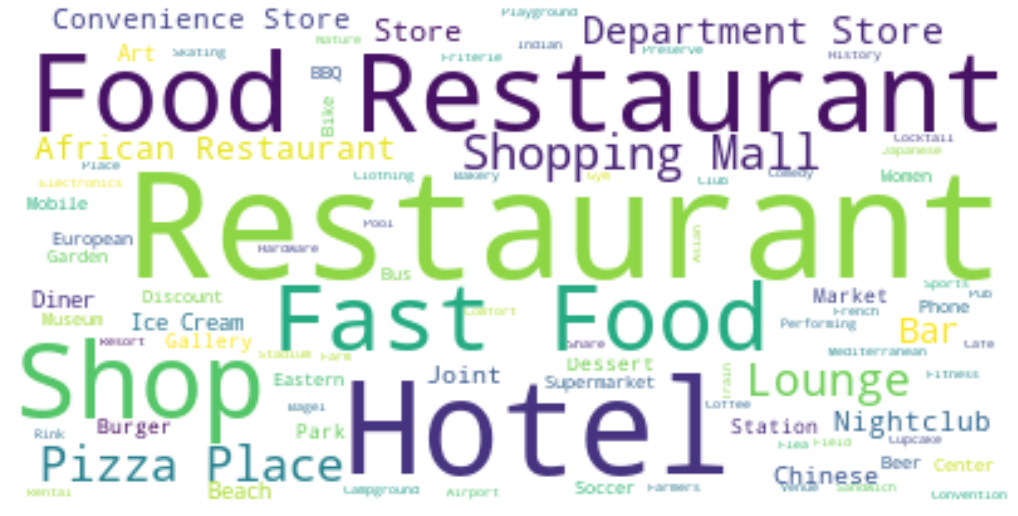

In [206]:
# Generate the WordCloud
top_venues_wc.generate(words)

# Set the Size
plt.figure(figsize=(18, 22))

# Display the WC
plt.imshow(top_venues_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Interesting! So the most common or freqent venues in all of Lagos State are:-
<br>**Food Restaurant**,
<br>**Food**,
<br>**Fast Food**,
<br>**Hotel**,
<br>**Shopping mall**,
<br>**Restaurant**,
<br>**Shop**
<br>Others include Pizza Place, Shopping Mall, African restaurant, E.t.c.

### To Recap:

In this notebook we explored Lagos State using it's [wikipedia page](https://en.wikipedia.org/wiki/List_of_Lagos_State_local_government_areas_by_population). We scraped the page using Beautiful soup and acquired its data using the request library and eventually we converted same from JSON format to a DataFrame using the json_normalize module.<br>
Then we explored each LGA of Lagos State, visualizing their maps through the folium module and exploring the categories of venues present in each LGA, in order to find the most ideal LGA or Top LGAs for a Start-up to cite an office in Lagos State.<br>
We used the foursquare API to get the details of venues for each location, using the geopy library to convert addresses to latitude and longitude.<br>
Then we explored the Lagos Mainland LGA, plotting it's venues on the map, and we explored Lagos state data to get the top 10 venues for each LGA.
<br> Then we clustered Lagos state into 5 clusters using the Kmeans algorithm, and finally we displayed the Top venue categories in Lagos state using a word cloud object.
<br> Kindly see below showing the details of the Top 5 LGAs to cite an office in Lagos State from this exercise.

Our top venues are<br>
1. Ikeja<br>
2. Lagos mainland<br>
3. Oshodi-Isolo<br>
4. Apapa<br>
5. Ajeromi Ifelodun

### A possible shortfall of this exercise.<br>

You may have noticed that for some reason no educational institution or religious institution was returned by foursquare API. This is a flaw as Lagos has over 50 institutions of learning spread across the state.<br>
Another flaw is on the data for Tech Hubs cited generally around Yaba, which is still under Lagos Mainland LGA.<br>
This adds credence to the fact yet again, that Lagos Mainland LGA is perhaps the most ideal location to cite an office in Lagos State.<br>
Thank you

In [215]:
# uncomment and run code below to kill the notebook and free up space

# import os, signal
# os.kill(os.getpid(),signal.SIGKILL)